In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
train=pd.read_csv('train.csv')

In [136]:
test=pd.read_csv('test.csv')

In [137]:
test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [138]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [140]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [141]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [142]:
train['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00000142    1152
             ... 
P00074742       1
P00069642       1
P00074542       1
P00062442       1
P00185942       1
P00348142       1
P00132742       1
P00149742       1
P00305442       1
P00070142       1
P00307242       1
P00083542       1
P00285142       1
P00068742       1
P00156642       1
P00215142       1
P00135942       1
P00106342       1
P00022042       1
P00305542       1
P00133042       1
P00206942       1
P00292142       1
P00335642       1
P00038642 

In [143]:
train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

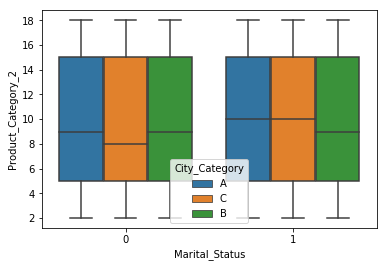

In [144]:
sns.boxplot(x='Marital_Status',y='Product_Category_2',data=train,hue='City_Category')

In [145]:
def prod(prodc):
    
    product_cat=prodc[0]
    city=prodc[1]
    marital=prodc[2]
    
    if pd.isnull(product_cat):
            
            if ((city=='A') & (marital==0)):
                return 14
            elif ((city=='B') & (marital==0)):
                return 14
            elif ((city=='C') & (marital==0)):
                return 14
            elif ((city=='A') & (marital==1)):
                return 14
            elif ((city=='B') & (marital==1)):
                return 14
            elif ((city=='C') & (marital==1)):
                return 15
            
    else:
            return product_cat
            


In [146]:
train['Product_Category_3'] = train[['Product_Category_3','City_Category','Marital_Status']].apply(prod,axis=1)

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [148]:
def prod(prodc):
    
    product_cat=prodc[0]
    city=prodc[1]
    marital=prodc[2]
    
    if pd.isnull(product_cat):
            
            if ((city=='A') & (marital==0)):
                return 9
            elif ((city=='B') & (marital==0)):
                return 9
            elif ((city=='C') & (marital==0)):
                return 8
            elif ((city=='A') & (marital==1)):
                return 10
            elif ((city=='B') & (marital==1)):
                return 9
            elif ((city=='C') & (marital==1)):
                return 10
            
    else:
            return product_cat
            


In [149]:
train['Product_Category_2'] = train[['Product_Category_2','City_Category','Marital_Status']].apply(prod,axis=1)

In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [151]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [152]:
e=pd.get_dummies(train['Gender'])

In [153]:
train=train.join(e)

In [154]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,0


In [155]:
import re

In [156]:
train['Age'][0]

'0-17'

In [157]:
def stay(num):
    if (num=='4+'):
        return 4
    else:
        return num

In [158]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].apply(stay)

In [159]:
train['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [160]:
s=pd.get_dummies(train['City_Category'])

In [161]:
train=train.join(s)

In [162]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,1,0,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,0,1,0,0


In [163]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [164]:
def age(no):
    if (no=='0-17'):
        return 17
    elif (no=='55+'):
        return 56
    elif (no=='51-55'):
        return 55
    elif (no=='46-50'):
        return 50
    elif (no=='18-25'):
        return 25
    elif (no=='36-45'):
        return 45
    else :
        return 35

In [165]:
train['Age']=train['Age'].apply(age)

In [166]:
train['Age'].value_counts()

35    219587
45    110013
25     99660
50     45701
55     38501
56     21504
17     15102
Name: Age, dtype: int64

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 17 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
F                             550068 non-null uint8
M                             550068 non-null uint8
A                             550068 non-null uint8
B                             550068 non-null uint8
C                             550068 non-null uin

In [168]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'F', 'M', 'A',
       'B', 'C'],
      dtype='object')

In [169]:
train['Product_ID'][0].split('P')[1]

'00069042'

In [170]:
train['Product_ID']=train['Product_ID'].apply(lambda x: int(x.split('P')[1]))

In [171]:
int(train['Product_ID'][0])

69042

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 17 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int64
Gender                        550068 non-null object
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
F                             550068 non-null uint8
M                             550068 non-null uint8
A                             550068 non-null uint8
B                             550068 non-null uint8
C                             550068 non-null uint

In [173]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'F', 'M', 'A',
       'B', 'C'],
      dtype='object')

In [175]:
X=train[['Product_ID',  'Age', 'Occupation',
        'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'F', 'M', 'A',
       'B', 'C']]
y=train['Purchase']

In [176]:
from sklearn.cross_validation import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm=LinearRegression()

In [180]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
pred=lm.predict(X_test)

In [195]:
r=pred.reshape(-1,1)
r

array([[ 11678.00779063],
       [ 10115.69988097],
       [  7491.91050776],
       ..., 
       [ 10498.37986985],
       [ 11753.06692594],
       [ 10427.54922001]])

In [200]:
o=y_test.reshape(-1,1)
o

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[19142],
       [15513],
       [ 7802],
       ..., 
       [ 5434],
       [19051],
       [11896]], dtype=int64)

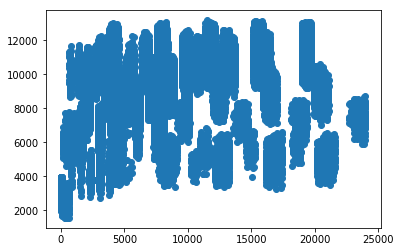

In [191]:
plt.scatter(y_test,pred)

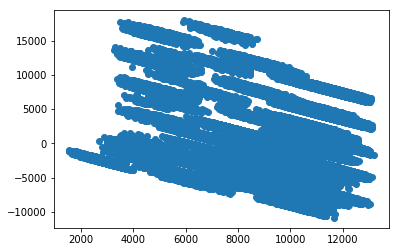

In [192]:
plt.scatter(pred,y_test-pred)

In [202]:
from sklearn import metrics

In [204]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3577.7632912
MSE: 21899347.6346
RMSE: 4679.67388122


In [205]:
print("Mean squared error: %.2f" % np.mean((lm.predict(X_test) - y_test) ** 2))

Mean squared error: 21899347.63


In [206]:
print('Variance score: %.2f' % lm.score(X_test, y_test))

Variance score: 0.13


In [207]:
y_test

84432     19142
72724     15513
197032     7802
353704    15455
91198      4492
263977     6965
340456     8763
24094     19347
157277     7017
531759    15594
140977     4649
414535    19549
504520     1762
197149     6186
241974     3663
532759    15394
490181    18952
261405     3044
345359     6025
127565     1462
396797     4261
220547    19112
361288    19297
217635     3515
397197     1811
153385    13593
380341    11418
401168     1030
325026     8203
436361     5325
          ...  
304889     7964
121759     6054
56517      8129
307279     8067
330408    11637
370726     8194
504939    16489
340927     7858
502856     9721
308510     1050
435074    10780
268392    19459
338450     9921
199536     9805
71830      9948
479558     8290
491704    15701
147285    10705
491958    19650
257801     4633
523522     2319
125705    16196
164652     7450
18671      5375
382386    10074
196106     9787
109474     3198
433228     5434
271831    19051
477613    11896
Name: Purchase, Length: 

In [208]:
pred

array([ 11678.00779063,  10115.69988097,   7491.91050776, ...,
        10498.37986985,  11753.06692594,  10427.54922001])